In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

## Create model dictionary

In [2]:
def create_model_dict():
    model_dict_reg = {}
    model_dict_clf = {}
    model_dict = {'regression':model_dict_reg, 'classification':model_dict_clf}
    
    model_dict_reg['ridge'] = (ridge_regression_pipeline, ridge_regression_parameters)
    model_dict_reg['lasso'] = (lasso_regression_pipeline, lasso_regression_parameters)
    model_dict_reg['en'] = (elastic_net_regression_pipeline, elastic_net_regression_parameters)
    model_dict_reg['knn'] = (knn_regression_pipeline, knn_regression_parameters)
    
    model_dict_clf['knn'] = (knn_classification_pipeline, knn_classification_parameters)
    model_dict_clf['svm'] = (svm_classification_pipeline, svm_classification_parameters)
    model_dict_clf['lda'] = (lda_classification_pipeline, lda_classification_parameters)
    model_dict_clf['qda'] = (qda_classification_pipeline, qda_classification_parameters)
    
    return model_dict

## Grid Search

In [3]:
def grid_search(X, Y, pipeline_name, pipeline_type, params=None, keep=None):
    pipeline, parameters = model_dict[pipeline_type][pipeline_name]
    if params:
        for key in params:
            params[key] = [params[key]]
        params[keep] = parameters[keep]
        parameters = params
    if pipeline_type == 'regression':
        grid = GridSearchCV(estimator=pipeline, param_grid=parameters, scoring='neg_mean_squared_error')
        grid.fit(X, Y)
        return -grid.best_score_, grid.best_estimator_, grid.best_params_, grid.cv_results_['mean_test_score']*-1
    elif pipeline_type == 'classification':
        grid = GridSearchCV(estimator=pipeline, param_grid=parameters, scoring='accuracy')
        grid.fit(X, Y)
        return grid.best_score_, grid.best_estimator_, grid.best_params_, grid.cv_results_['mean_test_score']

## MAIN

In [4]:
%run pipelines.py
%run parameters.py
%run util.py

pipeline_type = 'classification'
X_raw_c,Y_raw_c = load_data(pipeline_type, raw=True, gamma=False, rotate=False, mixed=False)
X_gamma_c,Y_gamma_c = load_data(pipeline_type, raw=False, gamma=True, rotate=False, mixed=False)
X_rot_c,Y_rot_c = load_data(pipeline_type, raw=False, gamma=False, rotate=True, mixed=False)
X_mix_c,Y_mix_c = load_data(pipeline_type, raw=False, gamma=False, rotate=False, mixed=True)

X_all_c = [X_raw_c, X_gamma_c, X_rot_c, X_mix_c]
Y_all_c = [Y_raw_c, Y_gamma_c, Y_rot_c, Y_mix_c]

### SVM

0.966666666667 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=0.251, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
[ 0.93333333  0.96666667  0.96666667  0.96666667  0.96666667]



0.933333333333 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=0.251, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
[ 0.91111111  0.93333333  0.93333333  0.93333333  0.93333333]



0.844444444444 Pipeline(memory=None

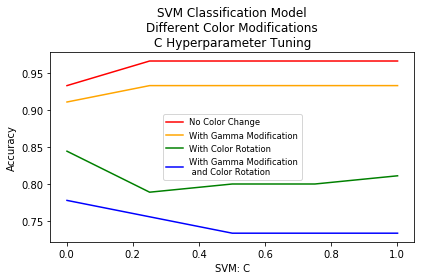

In [23]:
%run pipelines.py
%run parameters.py
%run util.py

C_range = np.arange(.001,1.02,.25)

model_dict = create_model_dict()

pipeline_name = 'svm'
pipeline_type = 'classification'
names = ["No Color Change", "With Gamma Modification", "With Color Rotation", "With Gamma Modification\n and Color Rotation"]
colors = ['r','orange','g','b']
plt.cla()
for i in range(len(names)):
    X = X_all_c[i]
    Y = Y_all_c[i]
    score,m,best_params,_ = grid_search(X, Y, pipeline_name, pipeline_type)
    _,_,_,all_scores = grid_search(X, Y, pipeline_name, pipeline_type, best_params, 'svm__C')
    plt.plot(C_range, all_scores, label=names[i], color=colors[i])
    print(score, m)
    print(all_scores)
    print('\n\n')
    
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')

plt.legend(prop=fontP)
plt.xlabel("SVM: C")
plt.ylabel("Accuracy")
plt.title('SVM Classification Model\nDifferent Color Modifications\nC Hyperparameter Tuning')
plt.tight_layout()
plt.savefig("svm_classification.png", dpi=500)
plt.show()

### LDA

1.0 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lda', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))])
[ 0.83333333  0.86666667  0.9         0.94444444  0.93333333  0.93333333
  0.94444444  0.94444444  0.92222222  0.98888889  1.          1.        ]



0.911111111111 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lda', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))])
[ 0.28888889  0.72222222  0.81111111  0.85555556  0.81111111  0.83333

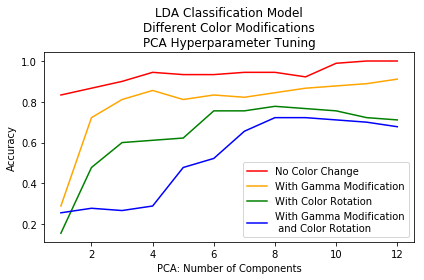

In [8]:
%run pipelines.py
%run parameters.py
%run util.py

s_range = np.arange(1, 13)

model_dict = create_model_dict()

pipeline_name = 'lda'
pipeline_type = 'classification'
names = ["No Color Change", "With Gamma Modification", "With Color Rotation", "With Gamma Modification\n and Color Rotation"]
colors = ['r','orange','g','b']
plt.cla()
for i in range(len(names)):
    X = X_all_c[i]
    Y = Y_all_c[i]
    score,m,best_params,_ = grid_search(X, Y, pipeline_name, pipeline_type)
    _,_,_,all_scores = grid_search(X, Y, pipeline_name, pipeline_type, best_params, 'pca__n_components')
    plt.plot(s_range, all_scores, label=names[i], color=colors[i])
    print(score, m)
    print(all_scores)
    print('\n\n')
plt.legend()
plt.xlabel("PCA: Number of Components")
plt.ylabel("Accuracy")
plt.title('LDA Classification Model\nDifferent Color Modifications\nPCA Hyperparameter Tuning')
plt.tight_layout()
plt.savefig("lda_classification.png", dpi=500)
plt.show()

### KNN

0.933333333333 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])
[ 0.9         0.87777778  0.87777778  0.9         0.93333333  0.92222222
  0.88888889  0.84444444  0.9         0.85555556  0.9         0.83333333
  0.75555556  0.71111111  0.58888889]



0.822222222222 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])
[ 0.82222222  0.75555556  0.72222222  0.7         0.73333333  0.73333333
  0.64444444  0.63333333  0.6         

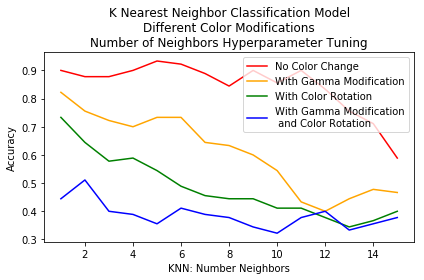

In [14]:
%run pipelines.py
%run parameters.py
%run util.py

nn = np.arange(1, 16)

model_dict = create_model_dict()

pipeline_name = 'knn'
pipeline_type = 'classification'
names = ["No Color Change", "With Gamma Modification", "With Color Rotation", "With Gamma Modification\n and Color Rotation"]
colors = ['r','orange','g','b']
plt.cla()
for i in range(len(names)):
    X = X_all_c[i]
    Y = Y_all_c[i]
    score,m,best_params,_ = grid_search(X, Y, pipeline_name, pipeline_type)
    _,_,_,all_scores = grid_search(X, Y, pipeline_name, pipeline_type, best_params, 'knn__n_neighbors')
    plt.plot(nn, all_scores, label=names[i], color=colors[i])
    print(score, m)
    print(all_scores)
    print('\n\n')
plt.legend()
plt.xlabel("KNN: Number Neighbors")
plt.ylabel("Accuracy")
plt.title('K Nearest Neighbor Classification Model\nDifferent Color Modifications\nNumber of Neighbors Hyperparameter Tuning')
plt.tight_layout()
plt.savefig("knn_classification.png", dpi=500)
plt.show()



## Regression

In [36]:
%run pipelines.py
%run parameters.py
%run util.py

pipeline_type = 'regression'
X_raw_r,Y_raw_r = load_data(pipeline_type, raw=True, gamma=False, rotate=False, mixed=False)
X_gamma_r,Y_gamma_r = load_data(pipeline_type, raw=False, gamma=True, rotate=False, mixed=False)
X_rot_r,Y_rot_r = load_data(pipeline_type, raw=False, gamma=False, rotate=True, mixed=False)
X_mix_r,Y_mix_r = load_data(pipeline_type, raw=False, gamma=False, rotate=False, mixed=True)

X_all_r = [X_raw_r, X_gamma_r, X_rot_r, X_mix_r]
Y_all_r = [Y_raw_r, Y_gamma_r, Y_rot_r, Y_mix_r]

### Ridge

[ 0.03383907  0.03383957  0.03385743  0.03527701  0.14038858] Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])



[ 0.07887805  0.07888448  0.07896118  0.08092546  0.18816447] Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])



[ 0.78075986  0.78077874  0.7809779   0.78397757  0.88745249] Pipeline(memory=None,
     steps=[('pca', PCA(copy=True,

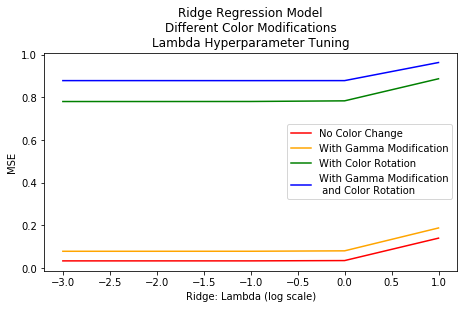

In [18]:
%run pipelines.py
%run parameters.py
%run util.py

A_range = [.001,.01,.1,1,10]

model_dict = create_model_dict()

pipeline_name = 'ridge'
pipeline_type = 'regression'
names = ["No Color Change", "With Gamma Modification", "With Color Rotation", "With Gamma Modification\n and Color Rotation"]
colors = ['r','orange','g','b']
plt.close()
for i in range(len(names)):
    X = X_all_r[i]
    Y = Y_all_r[i]
    _,m,best_params,_ = grid_search(X, Y, pipeline_name, pipeline_type)
    _,_,_,all_scores = grid_search(X, Y, pipeline_name, pipeline_type, best_params, 'ridge__alpha')
    plt.plot(np.log10(A_range), all_scores, label=names[i], color=colors[i])
    print(all_scores, m)
    print('\n\n')
print(plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = [6.6,4.4]
plt.legend()

plt.xlabel("Ridge: Lambda (log scale)")
plt.ylabel("MSE")
plt.title('Ridge Regression Model\nDifferent Color Modifications\nLambda Hyperparameter Tuning')
plt.tight_layout()
plt.savefig("ridge_regression3.png", dpi=500)
plt.show()

### KNN

0.0584112084751 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='distance'))])



0.0969482036764 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='distance'))])



0.380074306514 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=

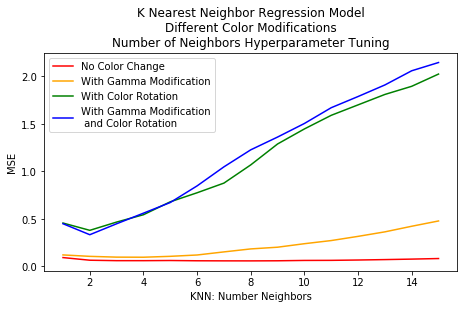

In [47]:
%run pipelines.py
%run parameters.py
%run util.py

nn = np.arange(1, 16)

model_dict = create_model_dict()

pipeline_name = 'knn'
pipeline_type = 'regression'
names = ["No Color Change", "With Gamma Modification", "With Color Rotation", "With Gamma Modification\n and Color Rotation"]
colors = ['r','orange','g','b']
plt.close()
for i in range(len(names)):
    X = X_all_r[i]
    Y = Y_all_r[i]
    _,m,best_params,_ = grid_search(X, Y, pipeline_name, pipeline_type)
    s,_,_,all_scores = grid_search(X, Y, pipeline_name, pipeline_type, best_params, 'knn__n_neighbors')
    plt.plot(nn, all_scores, label=names[i], color=colors[i])
    print(s, m)
    print('\n\n')
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.6,4.4]

plt.legend()

plt.xlabel("KNN: Number Neighbors")
plt.ylabel("MSE")
plt.title('K Nearest Neighbor Regression Model\nDifferent Color Modifications\nNumber of Neighbors Hyperparameter Tuning')
plt.tight_layout()
plt.savefig("knn_regression2.png", dpi=500)

plt.show()